## Project Title
### Multi-Modal Sentiment Analysis
## Team and Authors### GSBS
### Jiawei Song
### Ying Xiao

## Introduction### Decisions to be impact
### This project will mainly affect decisions related to customer feedback analysis. Specifically, for organizations and businesses, more accurately decrypting and classifying the motivations behind customer comments will help make more targeted decisions. This includes adjusting product design and improving customer satisfaction, helping companies to market their product more effectively and manage their brands, and improving customer retention and loyalty.

### Business value

### These decisions have important implications in business. Decisions based on comprehensive and accurate sentiment analysis can help companies enhance product/market fit, further boost the demand and popularity of the brand and business, and expand sustainable competitive advantage.

### Why do you care about this project
### The motivation for choosing this problem lies in the importance of sentiment analysis across various applications, such as social media monitoring, customer feedback analysis, and mental health assessment. Existing methods often rely solely on a single modality, which fails to provide a comprehensive understanding of emotional expression. By integrating multiple modalities, we can more accurately identify and comprehend emotions, thereby providing more robust tools and methodologies for relevant fields.

### The importance of this project to our team lies in the fact that we are all passionate about how to improve human life through big data technology. The application of sentiment analysis can not only drive business decisions, but also have a positive impact on social issues such as mental health. What's more, multimodal applications will gradually become mainstream. Through this project, we hope to conduct in-depth research on multimodal learning, combine it with sentiment analysis, and see its potential and value in practical applications.

## Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "label (1).csv"
# file_path = r'C:\Users\Grace\Desktop\SP25\527\Project\label.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head(10)

,video_id,clip_id,text,label,annotation,mode,label_T,label_A,label_V
0,-3g5yACwYnA,10,Key is part of the people that we use to solve...,1.000000,Positive,train,NaN,NaN,NaN
1,-3g5yACwYnA,13,They've been able to find solutions or at leas...,0.666667,Positive,train,NaN,NaN,NaN
2,-3g5yACwYnA,3,We're a huge user of adhesives for our operati...,0.000000,Neutral,train,NaN,NaN,NaN
3,-3g5yACwYnA,2,Key Polymer brings a technical aspect to our o...,0.000000,Neutral,train,NaN,NaN,NaN
4,-3g5yACwYnA,4,Key brings those types of aspects to a busines...,1.000000,Positive,train,NaN,NaN,NaN
5,-3g5yACwYnA,9,We have many new opportunities through the way...,0.666667,Positive,train,NaN,NaN,NaN
6,-3nNcZdcdvU,0,"Introduction Speaker: Dr. Erma Jean Sims, Sono...",0.333333,Positive,train,NaN,NaN,NaN
7,-3nNcZdcdvU,2,It's important for teachers to understand thei...,1.000000,Positive,train,NaN,NaN,NaN
8,-3nNcZdcdvU,5,Noncompliance can result in legal liability to...,0.000000,Neutral,train,NaN,NaN,NaN
9,-HwX2H8Z4hY,1,"A 1983 report, “A Nation at Risk,” argued that...",-0.666667,Negative,train,NaN,NaN,NaN


## Data Understanding

In [4]:
df.info

<bound method DataFrame.info of           video_id  clip_id  \
0      -3g5yACwYnA       10   
1      -3g5yACwYnA       13   
2      -3g5yACwYnA        3   
3      -3g5yACwYnA        2   
4      -3g5yACwYnA        4   
...            ...      ...   
22851  zhNksSReaQk       35   
22852  zhNksSReaQk       34   
22853  zhNksSReaQk       33   
22854  zvZd3V5D5Ik        3   
22855  zvZd3V5D5Ik        2   

                                                    text     label annotation  \
0      Key is part of the people that we use to solve...  1.000000   Positive   
1      They've been able to find solutions or at leas...  0.666667   Positive   
2      We're a huge user of adhesives for our operati...  0.000000    Neutral   
3      Key Polymer brings a technical aspect to our o...  0.000000    Neutral   
4      Key brings those types of aspects to a busines...  1.000000   Positive   
...                                                  ...       ...        ...   
22851  And yet, it's like, h

In [6]:
df.columns

Index(['video_id', 'clip_id', 'text', 'label', 'annotation', 'mode', 'label_T',
       'label_A', 'label_V'],
      dtype='object')

In [8]:
df.shape

(22856, 9)

In [10]:
df.isnull().sum()

video_id          0
clip_id           0
text              0
label             0
annotation        0
mode              0
label_T       22856
label_A       22856
label_V       22856
dtype: int64

## Data Preprocessing

In [13]:
# Get unique video_id and reassign new sequential IDs
unique_video_ids = df['video_id'].unique()
video_id_mapping = {old_id: f"vid_{i}" for i, old_id in enumerate(unique_video_ids)}

# Replace video_id with the new sequential ID
df['video_id'] = df['video_id'].map(video_id_mapping)

# Sort by video_id and clip_id
df = df.sort_values(by=['video_id', 'clip_id']).reset_index(drop=True)

# Drop the last three columns
df = df.drop(columns=['label_T', 'label_A', 'label_V'])

# Count the number of samples in each mode (train, validation, test)
mode_counts = df['mode'].value_counts()
print(mode_counts)

# Display the first 10 rows
df.head(10)

mode
train    16326
test      4659
valid     1871
Name: count, dtype: int64


,video_id,clip_id,text,label,annotation,mode
0,vid_0,2,Key Polymer brings a technical aspect to our o...,0.000000,Neutral,train
1,vid_0,3,We're a huge user of adhesives for our operati...,0.000000,Neutral,train
2,vid_0,4,Key brings those types of aspects to a busines...,1.000000,Positive,train
3,vid_0,9,We have many new opportunities through the way...,0.666667,Positive,train
4,vid_0,10,Key is part of the people that we use to solve...,1.000000,Positive,train
5,vid_0,13,They've been able to find solutions or at leas...,0.666667,Positive,train
6,vid_1,0,"Introduction Speaker: Dr. Erma Jean Sims, Sono...",0.333333,Positive,train
7,vid_1,2,It's important for teachers to understand thei...,1.000000,Positive,train
8,vid_1,5,Noncompliance can result in legal liability to...,0.000000,Neutral,train
9,vid_10,0,"In 2008, there were very serious tribal warfar...",-2.000000,Negative,train


In [15]:
# Define annotation categories based on label values
def categorize_label(label):
    if label == -3:
        return "highly negative"
    elif label == -2:
        return "negative"
    elif label == -1:
        return "weakly negative"
    elif label == 0:
        return "neutral"
    elif label == 1:
        return "weakly positive"
    elif label == 2:
        return "positive"
    elif label == 3:
        return "highly positive"
    else:
        return "unknown"  # Handle unexpected values

# Adjust non-integer label values by rounding to the nearest integer
df['rounded_label'] = df['label'].round().astype(int)

# Reapply the categorization based on the rounded label values
df['annotation'] = df['rounded_label'].apply(categorize_label)

# Drop the temporary rounded_label column
df = df.drop(columns=['rounded_label'])
df.head(10)

,video_id,clip_id,text,label,annotation,mode
0,vid_0,2,Key Polymer brings a technical aspect to our o...,0.000000,neutral,train
1,vid_0,3,We're a huge user of adhesives for our operati...,0.000000,neutral,train
2,vid_0,4,Key brings those types of aspects to a busines...,1.000000,weakly positive,train
3,vid_0,9,We have many new opportunities through the way...,0.666667,weakly positive,train
4,vid_0,10,Key is part of the people that we use to solve...,1.000000,weakly positive,train
5,vid_0,13,They've been able to find solutions or at leas...,0.666667,weakly positive,train
6,vid_1,0,"Introduction Speaker: Dr. Erma Jean Sims, Sono...",0.333333,neutral,train
7,vid_1,2,It's important for teachers to understand thei...,1.000000,weakly positive,train
8,vid_1,5,Noncompliance can result in legal liability to...,0.000000,neutral,train
9,vid_10,0,"In 2008, there were very serious tribal warfar...",-2.000000,negative,train


## Outlier Detection

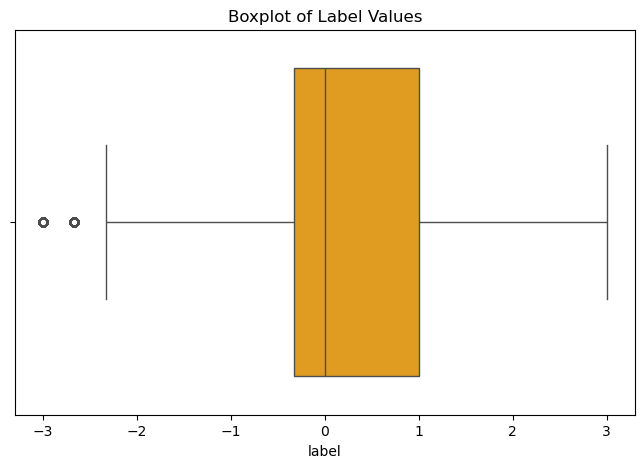

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['label'], color='orange')

plt.title("Boxplot of Label Values")

plt.show()

### There are a few outliers on the far left (around -3), but no extreme outliers on the right.
### The whiskers extend close to -2.5 and 3, meaning most data falls within this range.
### A small number of points are outside the left whisker, confirming potential outliers on the negative side.
### Any data point beyond these whiskers is considered an outlier by the IQR method.

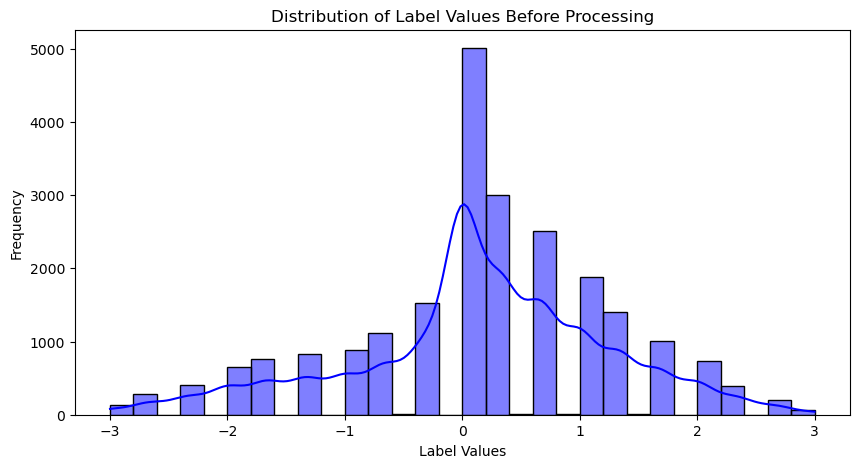

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 5))

# Plot histogram and KDE
sns.histplot(df['label'], bins=30, kde=True, color='blue', edgecolor='black')

# Set title and labels
plt.title("Distribution of Label Values Before Processing")
plt.xlabel("Label Values")
plt.ylabel("Frequency")

# Show plot
plt.show()

### The distribution is roughly centered around 0, indicating that most sentiment scores are neutral.
### The values range from -3 to 3, but the extremes (e.g., -3, 3) have much lower frequencies.
### The distribution has long tails, meaning that there are relatively few highly positive or highly negative samples.

In [32]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['label'].quantile(0.25)
Q3 = df['label'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers (typically 1.5*IQR, can adjust to 2*IQR if needed)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mark outliers
df['outlier_iqr'] = (df['label'] < lower_bound) | (df['label'] > upper_bound)

# Filter out outliers
df_no_outliers = df[~df['outlier_iqr']]
df_outliers = df[df['outlier_iqr']]

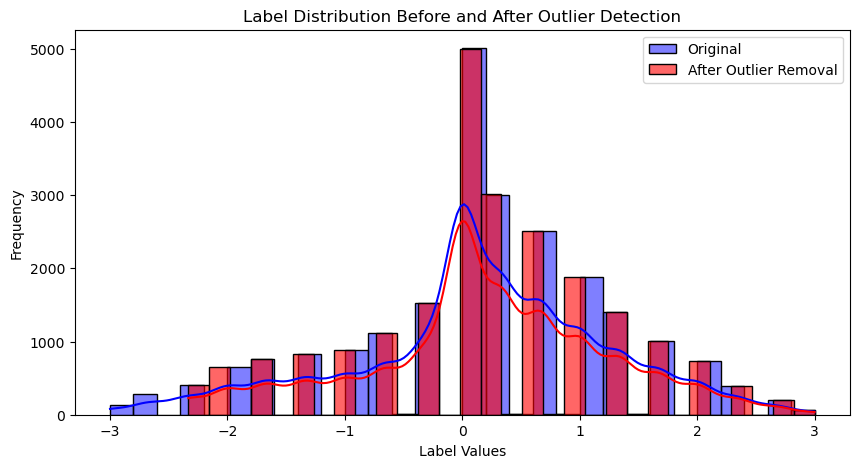

In [34]:
# Plot original distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['label'], bins=30, kde=True, color='blue', label='Original')

# Plot distribution after removing outliers
sns.histplot(df_no_outliers['label'], bins=30, kde=True, color='red', label='After Outlier Removal', alpha=0.6)

plt.legend()
plt.title("Label Distribution Before and After Outlier Detection")
plt.xlabel("Label Values")
plt.ylabel("Frequency")
plt.show()

### Non-sensitive to normality: Unlike Z-score, it works well even if the data is not normally distributed.
### Robust to extreme values: Since it focuses on the middle 50% of the data, it does not get influenced by a few extreme values.

In [37]:
df_outliers[['label','outlier_iqr']].head(10)

,label,outlier_iqr
149,-2.666667,True
150,-3.000000,True
600,-2.666667,True
662,-2.666667,True
738,-2.666667,True
752,-2.666667,True
963,-3.000000,True
966,-3.000000,True
967,-2.666667,True
1200,-2.666667,True


In [39]:
df_no_outliers.head(10)

,video_id,clip_id,text,label,annotation,mode,outlier_iqr
0,vid_0,2,Key Polymer brings a technical aspect to our o...,0.000000,neutral,train,False
1,vid_0,3,We're a huge user of adhesives for our operati...,0.000000,neutral,train,False
2,vid_0,4,Key brings those types of aspects to a busines...,1.000000,weakly positive,train,False
3,vid_0,9,We have many new opportunities through the way...,0.666667,weakly positive,train,False
4,vid_0,10,Key is part of the people that we use to solve...,1.000000,weakly positive,train,False
5,vid_0,13,They've been able to find solutions or at leas...,0.666667,weakly positive,train,False
6,vid_1,0,"Introduction Speaker: Dr. Erma Jean Sims, Sono...",0.333333,neutral,train,False
7,vid_1,2,It's important for teachers to understand thei...,1.000000,weakly positive,train,False
8,vid_1,5,Noncompliance can result in legal liability to...,0.000000,neutral,train,False
9,vid_10,0,"In 2008, there were very serious tribal warfar...",-2.000000,negative,train,False


## Data Visualization

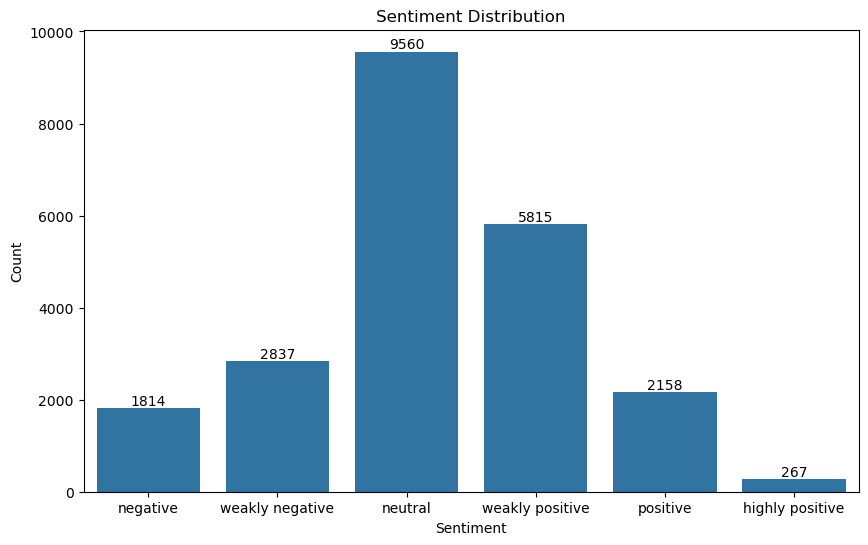

In [47]:
# Plot Sentiment distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_no_outliers, x='annotation')
plt.title('Sentiment Distribution')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [50]:
# Get the top videos by the number of clipes
top_videos = df_no_outliers['video_id'].value_counts().nlargest(20).index

# Filter data for only the top videos
top_videos_data = df_no_outliers[df_no_outliers['video_id'].isin(top_videos)]

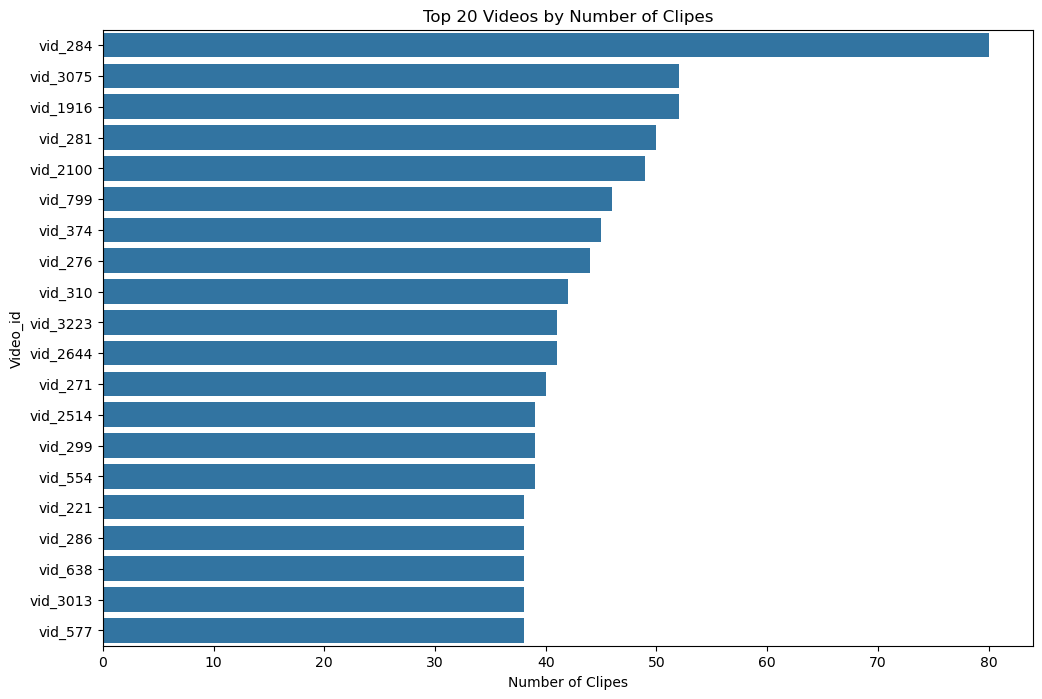

In [52]:
# Plot the number of clipes of each video_id
plt.figure(figsize=(12, 8))
sns.countplot(data=df_no_outliers[df_no_outliers['video_id'].isin(top_videos)], y='video_id', order=top_videos)
plt.title('Top 20 Videos by Number of Clipes')
plt.xlabel('Number of Clipes')
plt.ylabel('Video_id')
plt.show()

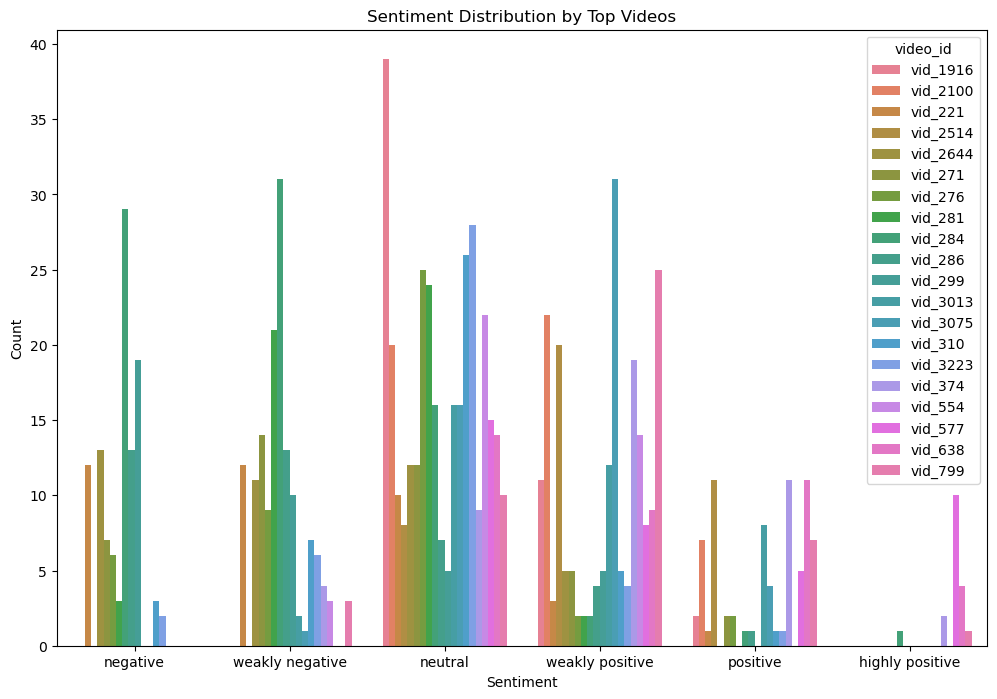

In [68]:
# Plot sentiment distribution for top videos
plt.figure(figsize=(12, 8))
sns.countplot(data=top_videos_data, x='annotation', hue='video_id')
plt.title('Sentiment Distribution by Top Videos')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

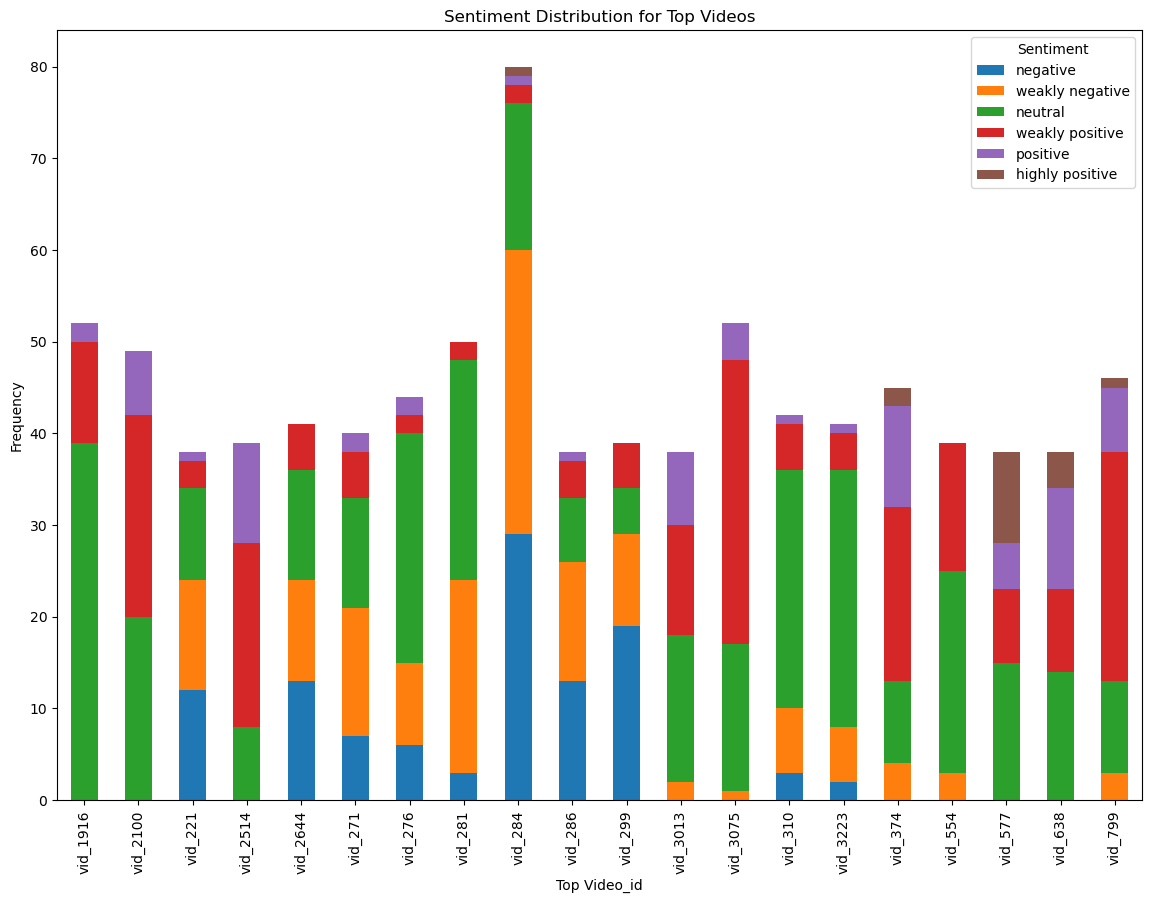

In [58]:
# Aggregating sentiment counts for top videos
video_sentiment = top_videos_data.groupby(['video_id', 'annotation'], observed=False).size().unstack().fillna(0)

# Plot this data
video_sentiment.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Sentiment Distribution for Top Videos')
plt.xlabel('Top Video_id')
plt.ylabel('Frequency')
plt.legend(title='Sentiment')
plt.show()

<Figure size 1200x800 with 0 Axes>

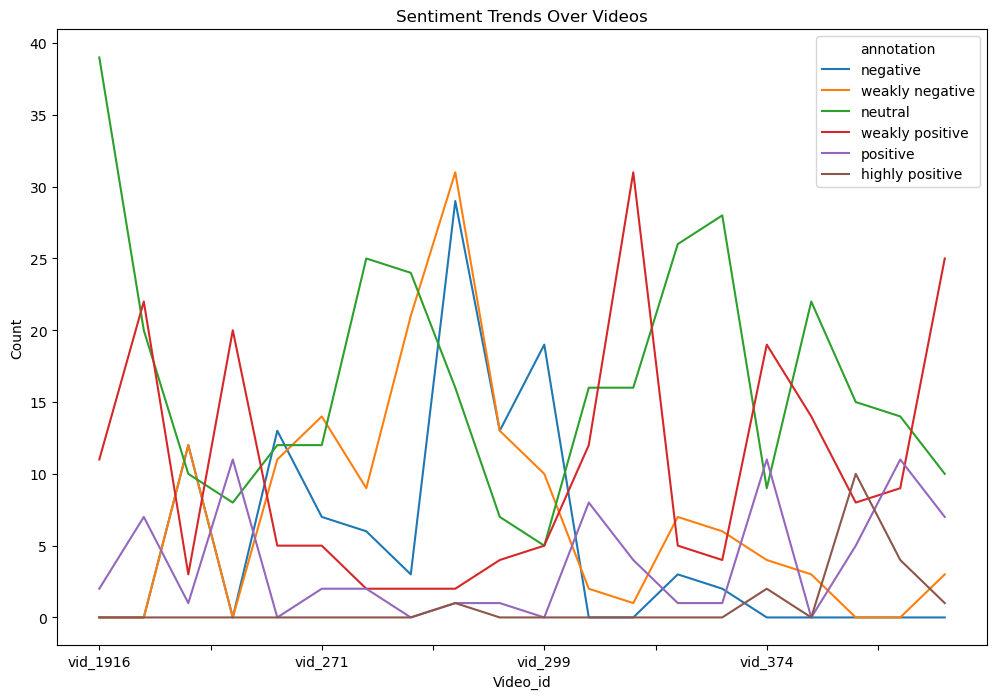

In [62]:
# Plot sentiment trends over the videos
plt.figure(figsize=(12, 8))
sentiment_counts = top_videos_data.groupby(['video_id', 'annotation'], observed=False).size().unstack().fillna(0)
sentiment_counts.plot(kind='line', figsize=(12, 8))
plt.title('Sentiment Trends Over Videos')
plt.xlabel('Video_id')
plt.ylabel('Count')
plt.show()

## Model & Performance

### 1.VADER (Valence Aware Dictionary and sEntiment Reasoner)
#### Type: Lexicon-based model (rule-based)
#### Purpose: It analyzes the sentiment polarity of sentences using a predefined lexicon of words and phrases.
#### It assigns positive, negative, and neutral sentiment scores to words.
#### It considers context modifiers (e.g., "not bad" is positive despite "bad" being negative).
#### Outputs a compound score between -1 (very negative) and +1 (very positive).

### 2.SentiWordNet (SWN)
#### Type: Lexicon-based model (based on WordNet)
#### Purpose: It assigns sentiment polarity scores to words based on their dictionary meanings.
#### It looks up words in WordNet, a large database of English words.
#### Each word has positive and negative scores.
#### Take the average sentiment score for all words in a sentence.
#### Outputs a final score (positive - negative) and scales it to [-3,3]

In [134]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary datasets (if not already downloaded)
#nltk.download('sentiwordnet')
#nltk.download('vader_lexicon')
#nltk.download('punkt')
#nltk.download('wordnet')

# Initialize VADER analyzer
vader_analyzer = SentimentIntensityAnalyzer()

def extract_emotion_words(text):
    """Extract emotion-related words from text using VADER and SentiWordNet"""
    words = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    emotion_words = set()  # Store emotion words

    # Extract emotion words using VADER
    for word in words:
        if word in vader_analyzer.lexicon:
            emotion_words.add(word)

    # Extract emotion words using SentiWordNet
    for word in words:
        synsets = list(swn.senti_synsets(word))
        if synsets:  # If the word exists in SentiWordNet
            pos_score = sum([s.pos_score() for s in synsets]) / len(synsets)
            neg_score = sum([s.neg_score() for s in synsets]) / len(synsets)
            if pos_score > 0.1 or neg_score > 0.1:  # Set a threshold to filter emotion words
                emotion_words.add(word)

    return ", ".join(emotion_words)  # Return the extracted emotion words

# Apply to the 'text' column of the DataFrame
df_no_outliers['emotion_words'] = df_no_outliers['text'].apply(extract_emotion_words)

C:\Users\rog\AppData\Local\Temp\ipykernel_41792\2023020277.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['emotion_words'] = df_no_outliers['text'].apply(extract_emotion_words)


In [135]:
df_no_outliers[['text', 'emotion_words']].head(20)

,text,emotion_words
0,Key Polymer brings a technical aspect to our o...,
1,We're a huge user of adhesives for our operati...,"expertise, huge"
2,Key brings those types of aspects to a busines...,"pretty, big, new, long"
3,We have many new opportunities through the way...,"new, opportunities"
4,Key is part of the people that we use to solve...,"solve, new, different, able, solutions, resist..."
5,They've been able to find solutions or at leas...,"some, solutions, able"
6,"Introduction Speaker: Dr. Erma Jean Sims, Sono...",education
7,It's important for teachers to understand thei...,"an, ethical, important, educational, legal"
8,Noncompliance can result in legal liability to...,"district, liability, noncompliance, legal"
9,"In 2008, there were very serious tribal warfar...","warfare, serious, election, disputed, very"


In [138]:
df_no_outliers.isnull().sum()

video_id         0
clip_id          0
text             0
label            0
annotation       0
mode             0
outlier_iqr      0
emotion_words    0
dtype: int64

In [139]:
def get_sentiwordnet_score(text):
    """Calculate sentiment score using SentiWordNet"""
    words = word_tokenize(text.lower())
    scores = []

    for word in words:
        synsets = list(swn.senti_synsets(word))
        if synsets:  # If the word exists in SentiWordNet
            pos_score = np.mean([s.pos_score() for s in synsets])
            neg_score = np.mean([s.neg_score() for s in synsets])
            scores.append(pos_score - neg_score)  # Positive score - Negative score

    if scores:
        avg_score = np.mean(scores)  # Calculate average score
        return avg_score * 3  # Map to [-3, 3]
    else:
        return 0  # If no matching emotion words, default to neutral

def compute_sentiment_score(text):
    """Compute final sentiment score by combining VADER and SentiWordNet"""
    # Calculate overall sentiment using VADER
    vader_score = vader_analyzer.polarity_scores(text)['compound'] * 3  # Map to [-3, 3]

    # Calculate word-level sentiment using SentiWordNet
    sentiwordnet_score = get_sentiwordnet_score(text)

    # Combine the two sentiment scores (weights: VADER 0.7, SentiWordNet 0.3)
    final_score = 0.7 * vader_score + 0.3 * sentiwordnet_score

    return round(final_score, 2)  # Round to 2 decimal places

# Compute sentiment scores and add to DataFrame
df_no_outliers['sentiment_score'] = df_no_outliers['text'].apply(compute_sentiment_score)

C:\Users\rog\AppData\Local\Temp\ipykernel_41792\907253512.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['sentiment_score'] = df_no_outliers['text'].apply(compute_sentiment_score)


In [140]:
df_no_outliers[['text', 'sentiment_score']].head(20)

,text,sentiment_score
0,Key Polymer brings a technical aspect to our o...,0.00
1,We're a huge user of adhesives for our operati...,0.68
2,Key brings those types of aspects to a busines...,1.04
3,We have many new opportunities through the way...,0.84
4,Key is part of the people that we use to solve...,1.09
5,They've been able to find solutions or at leas...,0.40
6,"Introduction Speaker: Dr. Erma Jean Sims, Sono...",0.01
7,It's important for teachers to understand thei...,1.50
8,Noncompliance can result in legal liability to...,-0.13
9,"In 2008, there were very serious tribal warfar...",-1.37


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.cluster import DBSCAN

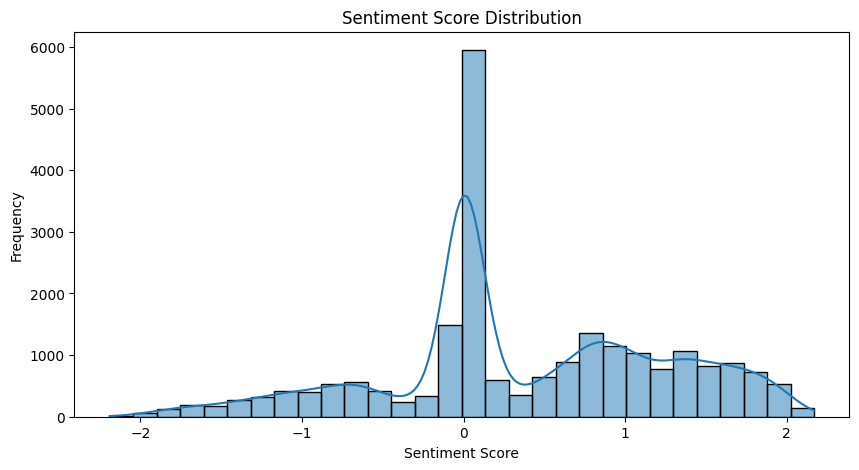

In [141]:
plt.figure(figsize=(10, 5))
sns.histplot(df_no_outliers['sentiment_score'], bins=30, kde=True)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

In [142]:
# Function to categorize sentiment scores
def categorize_sentiment(score):
    if score <= -0.5:
        return -1  # Negative
    elif score > -0.5 and score < 0.5:
        return 0  # Neutral
    else:
        return 1  # Positive

# Convert ground truth labels and predicted sentiment scores
df_no_outliers['true_class'] = df_no_outliers['label'].apply(categorize_sentiment)
df_no_outliers['predicted_class'] = df_no_outliers['sentiment_score'].apply(categorize_sentiment)

C:\Users\rog\AppData\Local\Temp\ipykernel_41792\1703944668.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['true_class'] = df_no_outliers['label'].apply(categorize_sentiment)
C:\Users\rog\AppData\Local\Temp\ipykernel_41792\1703944668.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['predicted_class'] = df_no_outliers['sentiment_score'].apply(categorize_sentiment)


In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute accuracy
accuracy = accuracy_score(df_no_outliers['true_class'], df_no_outliers['predicted_class'])

# Compute precision, recall, F1-score (for multi-class classification)
precision = precision_score(df_no_outliers['true_class'], df_no_outliers['predicted_class'], average='weighted')
recall = recall_score(df_no_outliers['true_class'], df_no_outliers['predicted_class'], average='weighted')
f1 = f1_score(df_no_outliers['true_class'], df_no_outliers['predicted_class'], average='weighted')

# Compute confusion matrix
conf_matrix = confusion_matrix(df_no_outliers['true_class'], df_no_outliers['predicted_class'])

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.53
Precision: 0.53
Recall: 0.53
F1-score: 0.53
Confusion Matrix:
[[1764 1640 1251]
 [1202 5011 3332]
 [ 385 2719 5147]]


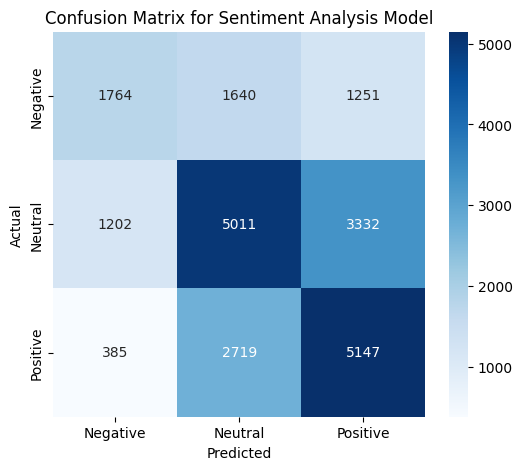

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Sentiment Analysis Model")
plt.show()

## Next Steps--use aligned senti-data，label_T,label_A,label_V

#### 1.investigates optimal selection and fusion of feature encoders across multiple modalities—specifically text ，audio and visual data
#### 2.compare different fusion methods and examine the impact of multi-loss training within the multimodal fusion network
#### 3.Apply attention layers to weigh the importance of different modalities dynamically.
#### 4.Analyze results; refine models based on performance metrics.